# AI Exam

An advanced aquatic drone, is deployed to collect critical data on marine biodiversity in a coastal region. The drone starts at point $S$, located near the shore, and must navigate to point $G$, a designated marine research site rich in coral reefs and sea life. Along the way, the drone must carefully maneuver through dynamic underwater environments, avoiding hazards and optimizing its energy usage.

The environment includes:  
1. **(O) Open Water:** Normal movement; no additional challenges.  
2. **(C) Currents:** Areas where the drone's movement is influenced by ocean currents, potentially pushing it off course.  
3. **(F) Seaweed Forests:** Dense vegetation that slows down the drone, incurring extra energy costs per move.    
5. **(E) Energy Stations:** Specific points where the drone can recharge its battery, reducing the total cost navigation.  


<img src="images/env_ex2.png" style="zoom: 20%;"/>



### Environment Details:

- **Grid Representation:** The environment is represented as in the above image (a grid 10x10).  
- $S$ - Start state: The drone's starting point at (0, 0).  
- $G$ - Goal state: The marine research site at (9, 7), providing a large positive reward +20.0 and ending the episode.  
- **Movement Costs:** Each move has a default energy cost of -0.04.  
- **Hazards:**  
  - **Strong Currents:** Entering a zone with current results in a stochastic movement:  
    - 80% chance to move as intended.  
    - 10% chance to be pushed one cell in the left direction perpendicular to the desired movement.  
    - 10% chance to be pushed one cell in the right direction perpendicular to the desired movement. 
  - **Seaweed Forests:** Entering these zones incurs an additional -0.2 reward penalty with respect to the standard movement cost (i.e., a total -0.24 penalty).

- **Energy Stations:** Provide a +1.0 reward when visited (however reaching these cells may require the agent to move far from the goal).  

You can use the following code to explore better the environment

In [1]:
import os, sys 
import tqdm

module_path = os.path.abspath(os.path.join('tools'))
if module_path not in sys.path:
    sys.path.append(module_path)

import gym, envs
from utils.ai_lab_functions import *
import numpy as np
from timeit import default_timer as timer
from tqdm import tqdm as tqdm


env_name = 'AquaticEnv-v0'
env = gym.make(env_name)

env.render()

print("\nActions encoding: ", env.actions)

# Remember that you can know the type of a cell whenever you need by accessing the grid element of the environment:
print("Cell type of start state: ",env.grid[env.startstate])
print("Cell type of goal state: ",env.grid[env.goalstate])
state = 3 # forest
print(f"Cell type of cell {env.state_to_pos(state)}: ",env.grid[state])
print("Cell type of goal state: {} Reward: {}".format(env.grid[state],env.RS[state]))
state = 12 # corrent
print(f"Cell type of cell {env.state_to_pos(state)}: ",env.grid[state])
print("Cell type of goal state: {} Reward: {}".format(env.grid[state],env.RS[state]))
state = 17 # energy station
print(f"Cell type of cell {env.state_to_pos(state)}: ",env.grid[state])
print("Cell type of goal state: {} Reward: {}".format(env.grid[state],env.RS[state]))

[['S' 'O' 'O' 'F' 'F' 'F' 'F' 'O' 'O' 'O']
 ['O' 'F' 'C' 'C' 'C' 'O' 'F' 'E' 'F' 'O']
 ['O' 'O' 'F' 'F' 'F' 'O' 'F' 'F' 'F' 'C']
 ['F' 'C' 'F' 'F' 'E' 'C' 'F' 'O' 'F' 'C']
 ['F' 'C' 'F' 'F' 'F' 'C' 'F' 'O' 'F' 'C']
 ['F' 'E' 'F' 'O' 'O' 'O' 'F' 'E' 'F' 'C']
 ['O' 'O' 'O' 'O' 'O' 'O' 'F' 'F' 'F' 'C']
 ['O' 'F' 'F' 'F' 'O' 'O' 'O' 'F' 'F' 'C']
 ['O' 'O' 'O' 'O' 'F' 'F' 'F' 'F' 'F' 'C']
 ['F' 'F' 'F' 'O' 'O' 'O' 'O' 'G' 'O' 'F']]

Actions encoding:  {0: 'L', 1: 'R', 2: 'U', 3: 'D'}
Cell type of start state:  S
Cell type of goal state:  G
Cell type of cell (0, 3):  F
Cell type of goal state: F Reward: -0.2
Cell type of cell (1, 2):  C
Cell type of goal state: C Reward: -0.04
Cell type of cell (1, 7):  E
Cell type of goal state: E Reward: 1.0


In [2]:
#Action encoding
print("\nActions encoding: ", env.actions)

# Remember that you can know the type of a cell whenever you need by accessing the grid element of the environment:
print("Cell type of start state: ",env.grid[env.startstate])
print("Cell type of goal state: {} Reward: {}".format(env.grid[env.goalstate],env.RS[env.goalstate]))

state = 1 # normal state
print(f"\nCell type of cell {env.state_to_pos(state)}: ",env.grid[state])
print("Cell type of goal state: {} Reward: {}".format(env.grid[state],env.RS[state]))

print(f"Probability of effectivelty performing action {env.actions[0]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[0], state+1]}")
print(f"Probability of effectivelty performing action {env.actions[1]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[1], state+1]}")
print(f"Probability of effectivelty performing action {env.actions[2]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[2], state+1]}")
print(f"Probability of effectivelty performing action {env.actions[3]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[3], state+1]}")

state = 13 # state with stochastic transitions
print(f"\nCell type of cell {env.state_to_pos(state)}: ",env.grid[state])
print("Cell type of goal state: {} Reward: {}".format(env.grid[state],env.RS[state]))

print(f"Probability of effectivelty performing action {env.actions[0]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[0], state+1]}")
print(f"Probability of effectivelty performing action {env.actions[1]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[1], state+1]}")
print(f"Probability of effectivelty performing action {env.actions[2]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[2], state+1]}")
print(f"Probability of effectivelty performing action {env.actions[3]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[3], state+1]}")



Actions encoding:  {0: 'L', 1: 'R', 2: 'U', 3: 'D'}
Cell type of start state:  S
Cell type of goal state: G Reward: 20.0

Cell type of cell (0, 1):  O
Cell type of goal state: O Reward: -0.04
Probability of effectivelty performing action L from cell (0, 1) to cell (0, 2): 0.0
Probability of effectivelty performing action R from cell (0, 1) to cell (0, 2): 1.0
Probability of effectivelty performing action U from cell (0, 1) to cell (0, 2): 0.0
Probability of effectivelty performing action D from cell (0, 1) to cell (0, 2): 0.0

Cell type of cell (1, 3):  C
Cell type of goal state: C Reward: -0.04
Probability of effectivelty performing action L from cell (1, 3) to cell (1, 4): 0.0
Probability of effectivelty performing action R from cell (1, 3) to cell (1, 4): 0.8
Probability of effectivelty performing action U from cell (1, 3) to cell (1, 4): 0.1
Probability of effectivelty performing action D from cell (1, 3) to cell (1, 4): 0.1


#### Q1. Find an optimal solution to this problem by using the approach that you think is most appropriate. Motivate your choice

In [3]:
"""
We use the value iteration algorithm to solve this MDP environment because it is well-suited for environments with a finite number of states (10 x 10) and 
actions (4 possibile movements). Value iteration is efficient in finding the optimal policy by iteratively updating the value of each state based on
the expected rewards and transitions and due to the stochastic nature of the environment, it effectively handles uncertainties in state transitions.
"""


def value_iteration(environment, maxiters=300, discount=0.8, max_error=1e-3):
    """
    Performs the value iteration algorithm for a specific environment
    
    Args:
        environment: OpenAI Gym environment
        maxiters: timeout for the iterations
        discount: gamma value, the discount factor for the Bellman equation
        max_error: the maximum error allowd in the utility of any state
        
    Returns:
        policy: 1-d dimensional array of action identifiers where index `i` corresponds to state id `i`
    """
    
    # initialize the utility of each state to zero
    U_1 = [0 for _ in range(environment.observation_space.n)] 
   
    # loop until convergence or timeout
    while True:
        
        # copy the utility values from the previous loop
        U = U_1.copy()
        delta = 0 # variable to keep track of the maximum change in utily during this iteration
        for current_state in range(environment.observation_space.n):
            
            # if the current state is a terminal state, set its utility to the reward of thta state
            if environment.grid[current_state] == "G":
                U_1[current_state] = environment.RS[current_state] 
                continue
            
            # set the maximum future utility to a very low value
            max_future = -np.inf

            # iterate over all possibile actions
            for i in range(environment.action_space.n):
                
                # set the sum to zero
                somma = 0.0

                # iterate over all possibile next states
                for next_state in range(environment.observation_space.n):
                    # set the sum according to the Bellman equation
                    somma += (environment.T[current_state,i,next_state] * U[next_state])
                
                # update the maximum future utility if the current action's utility is higher
                max_future = max(max_future,somma)
                
            # update the utility of the current state according to the Bellman equation
            U_1[current_state] = environment.RS[current_state] + discount*max_future 

            # update the maximum error if the current state's utility has changed more than the previous maximum error
            if abs(U_1[current_state] - U[current_state]) > delta:
                delta = abs(U_1[current_state] - U[current_state])
        
        # check for convergence or timeout 
        if maxiters <= 0 or delta < (max_error*(1-discount)/discount): 
              break
        # decrement the maximum iteration counter
        maxiters -= 1
    
    # return the policy from the final utility values               
    return values_to_policy(np.asarray(U_1), environment)

You can visualize and check your solution using the following code:

Method: MDP Value Iteration
[['D' 'R' 'D' 'D' 'D' 'D' 'R' 'D' 'L' 'L']
 ['D' 'D' 'R' 'R' 'D' 'R' 'R' 'D' 'L' 'L']
 ['R' 'D' 'R' 'R' 'D' 'D' 'R' 'D' 'L' 'L']
 ['R' 'D' 'R' 'R' 'D' 'D' 'R' 'D' 'L' 'L']
 ['D' 'D' 'R' 'D' 'D' 'D' 'R' 'D' 'L' 'L']
 ['R' 'R' 'R' 'R' 'R' 'R' 'R' 'D' 'L' 'L']
 ['D' 'R' 'R' 'R' 'R' 'D' 'D' 'D' 'D' 'D']
 ['D' 'D' 'D' 'D' 'R' 'R' 'D' 'D' 'D' 'D']
 ['R' 'R' 'R' 'D' 'D' 'D' 'D' 'D' 'D' 'D']
 ['R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'L']]


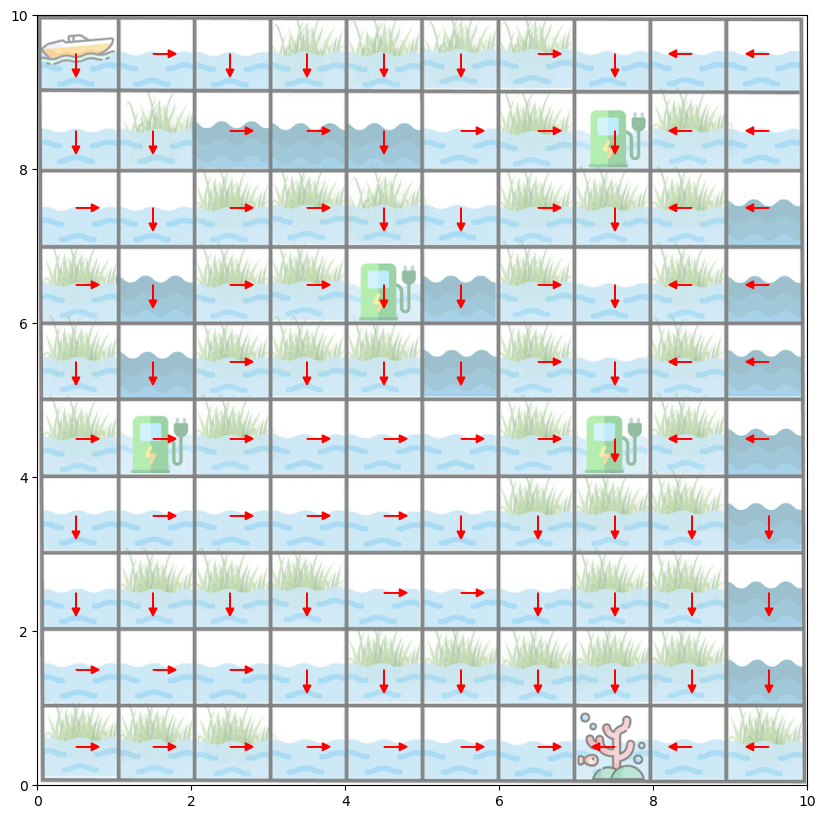

In [4]:
print("Method: MDP Value Iteration")
solution = value_iteration(env)
visual_solution = np.vectorize(env.actions.get)(solution.reshape(env.rows, env.cols))
print(visual_solution)
plot_policy(policy=visual_solution, name_env="ex2_render")

#### Analyze the solution returned by your approach and comment on whether the solution passes by at least two charging stations to reach the coral for every possible execution.

## The solution

The solution given from our approach, which is the _Value Iteration_ for a MDP, says that in the best of the cases the boat reaches two charging stations (the one in $(1, 5)$ and the one in $(7, 5)$).

If we take a look carefully, the solution says that in any of the other cases the boat will reach at least two charging stations. The common station is the one situated in $(7, 5)$.

The only case in which the boat will not reach two charging stations is when, in cell $(1, 5)$, the boat will be forced into the right cell, so the boat will miss the station in $(1, 5)$ and try to reach the only nearest station to the _goal_, the one in $(7, 5)$.

In the end, we can say that the _Value Iteration_ function tries to reach one of the charging station located in $(1, 5)$, $(5, 7)$ or $(7, 9)$, just to go to the $(7, 5)$ cell and then go straight to the _Goal_.

It is important to mention that we need to set the _discount_ in the function with a value $0.8 \le \text{discount} \le 0.9$ to get a proper solution to the problem, otherwise the boat will not reach the _Goal_ state.